In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsy
import os.path
from os.path import exists
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [35]:
ISBN = "isbn"
USER = "user"
RATING = "rating"
ISO = "ISO-8859-1"
TITLE = "title"
AUTHOR = "author"

books_fn = "BX-Books.csv"
ratings_fn = "BX-Book-Ratings.csv"

In [36]:
if not exists(books_fn) and not exists(ratings_fn):
  !wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

  !unzip book-crossings.zip


In [37]:
book_df = pd.read_csv(
    books_fn,
    sep=";",
    header=0,
    encoding = ISO,
    names=[ISBN, TITLE, AUTHOR],
    usecols=[ISBN, TITLE, AUTHOR],
    dtype={ISBN: 'str', TITLE: 'str', AUTHOR: 'str'}
)

book_df.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [38]:
ratings_df = pd.read_csv(
    ratings_fn,
    encoding=ISO,
    sep=";",
    header=0,
    names=[USER, ISBN, RATING],
    usecols=[USER, ISBN, RATING],
    dtype={USER: 'int32', ISBN: 'str', RATING: 'float32'})

ratings_df.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


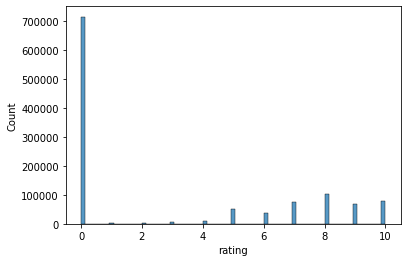

In [39]:
sns.histplot(data=ratings_df, x=RATING)

In [40]:
filter_1 = ratings_df[USER].value_counts()
filter_2 = ratings_df[ISBN].value_counts()
ratings_df = ratings_df[~ratings_df[USER].isin(filter_1[filter_1 < 200].index) & ~ratings_df[ISBN].isin(filter_2[filter_2 < 100].index)]

In [41]:
df_table = ratings_df.pivot_table(index=ISBN, columns=USER, values=RATING).fillna(0)
df_table.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_table.index = df_table.join(book_df.set_index(ISBN))[TITLE]
df_table.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
Angels,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Boy Next Door,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
METRIC = "cosine"

def recommend(book: str = ""):
  recommendations = []
  table_vals = df_table.values
  nbrs_model = NearestNeighbors(n_neighbors=6, metric=METRIC).fit(table_vals)
  dist, indices = nbrs_model.kneighbors([df_table.loc[book].values], n_neighbors=6)

  for i in range(1, 6):
    recommendations.append([df_table.index[indices[0][-i]], dist[0][-i]])

  return [book, recommendations]

In [44]:
exemple = "Where the Heart Is (Oprah's Book Club (Paperback))"
book = recommend(book = exemple)
print(book)

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7234864]]]


In [45]:
def test_recommendations():
  recommends = recommend(exemple)
  t_pass = True

  if recommends[0] != exemple:
    t_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]

  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      t_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      t_pass = False
  if t_pass:
    print("Test passed")
  else:
    print("Test not passed")

test_recommendations()


Test passed
